# LABORATORIUM SIECI NEURONOWE - Maciej Dutkowski 260396

## Ćwiczenie 1 - Analiza eksploracyjna

#### Import danych

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import shapiro

In [1]:
warnings.filterwarnings('ignore')

NameError: name 'warnings' is not defined

In [3]:
heart_disease = fetch_ucirepo(id=45) 
  
X = heart_disease.data.features 
Y = heart_disease.data.targets

#### Wstępna analiza danych

In [4]:
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [5]:
categorical_features_labels = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
numerical_features_labels = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
display(X, Y)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1



Jak widać zbiór składa z 303 próbek. Każda próbka zawiera 13 cech, w tym 6 liczbowych i  7 kategorycznych. Każda próbka odnosi się do jednego pacjenta i jego cech/wyników badań takich jak :
- wiek
- płeć
- poziom cukru we krwi
- maksymalne tętno
- poziom choloesterolu
- itd...  

Etykieta jest wartością kategoryczną obejmującą 5 klas (wartości 0,1,2,3,4), które oznaczają :
- 0 - brak choroby serca
- 1,2,3,4 - wystąpiła choroba serca


### Zbalansowanie liczby próbek na klasy

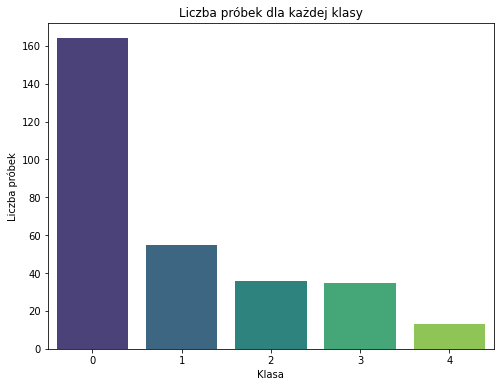

In [6]:
class_counts = Y['num'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.xlabel('Klasa')
plt.ylabel('Liczba próbek')
plt.title('Liczba próbek dla każdej klasy')
plt.show()

Jak widać ilość próbek należących do klasy 0 jest podobna do sumarycznej ilości próbek z klas 1,2,3,4. Tak więc dane mogą być przede wszytkim użyteczne do klasyfikacji tego czy choroba wystąpiła lub nie (bez podziału na klasy choroby).

### Średnie i odchylenia cech liczbowych

In [7]:
numerical_features = X[numerical_features_labels]

display(pd.DataFrame({
    'Średnia': numerical_features.mean(),
    'Odchylenie standardowe': numerical_features.std()
}))

,Średnia,Odchylenie standardowe
age,54.438944,9.038662
trestbps,131.689769,17.599748
chol,246.693069,51.776918
thalach,149.607261,22.875003
oldpeak,1.039604,1.161075


### Czy rozkład cech liczbowych jest w przybliżeniu normalny

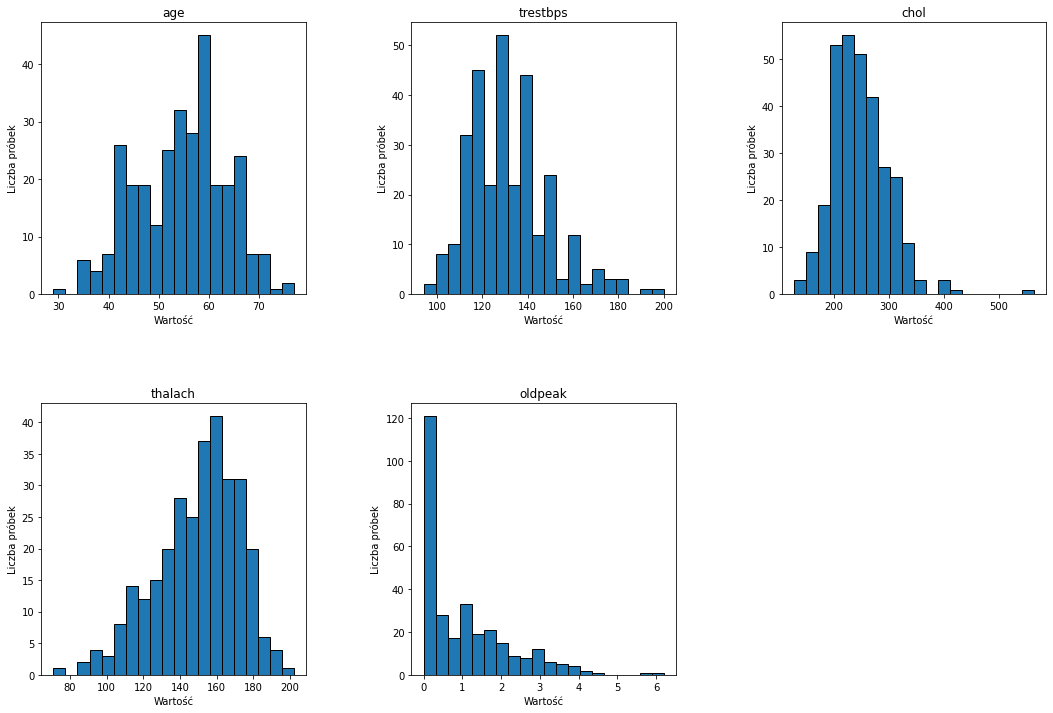

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)
numerical_features_labels_copy = numerical_features_labels.copy()

for i in range(2):
    for j in range(3):
        if numerical_features_labels_copy:
            category = numerical_features_labels_copy.pop(0)
            axs[i, j].hist(X[category], bins=20, edgecolor='black')
            axs[i, j].set_xlabel("Wartość")
            axs[i, j].set_ylabel('Liczba próbek')
            axs[i, j].set_title(category)
        else:
            axs[i, j].axis('off')
plt.show()

In [9]:
shapiro_results = []
for column in numerical_features.columns:
    stat, p_value = shapiro(numerical_features[column])
    shapiro_results.append({
        'Cecha': column, 
        'Statystyka testowa': stat, 
        'Prawdopodobieństwo p': p_value, 
        'Rozkład normalny (p>0.05)': p_value > 0.05
    })

shapiro_df = pd.DataFrame(shapiro_results)
display(shapiro_df)

,Cecha,Statystyka testowa,Prawdopodobieństwo p,Rozkład normalny (p>0.05)
0,age,0.986463,6.067252e-03,False
1,trestbps,0.966544,1.801297e-06,False
2,chol,0.947253,5.910671e-09,False
3,thalach,0.976453,6.997911e-05,False
4,oldpeak,0.844184,8.183467e-17,False


Jak widać na podstawie histogramów i testów Shapiro żaden rozkład cech liczbowych nie można uznać za porzybliżenie rozkładu normalnego. Najbliżej tego rozkładu wypadła cecha wiek (p ~ 0.006), a najgorzej cecha oldpeak.

### Czy rozkład cech kategorycznych jest w przybliżeniu równomierny

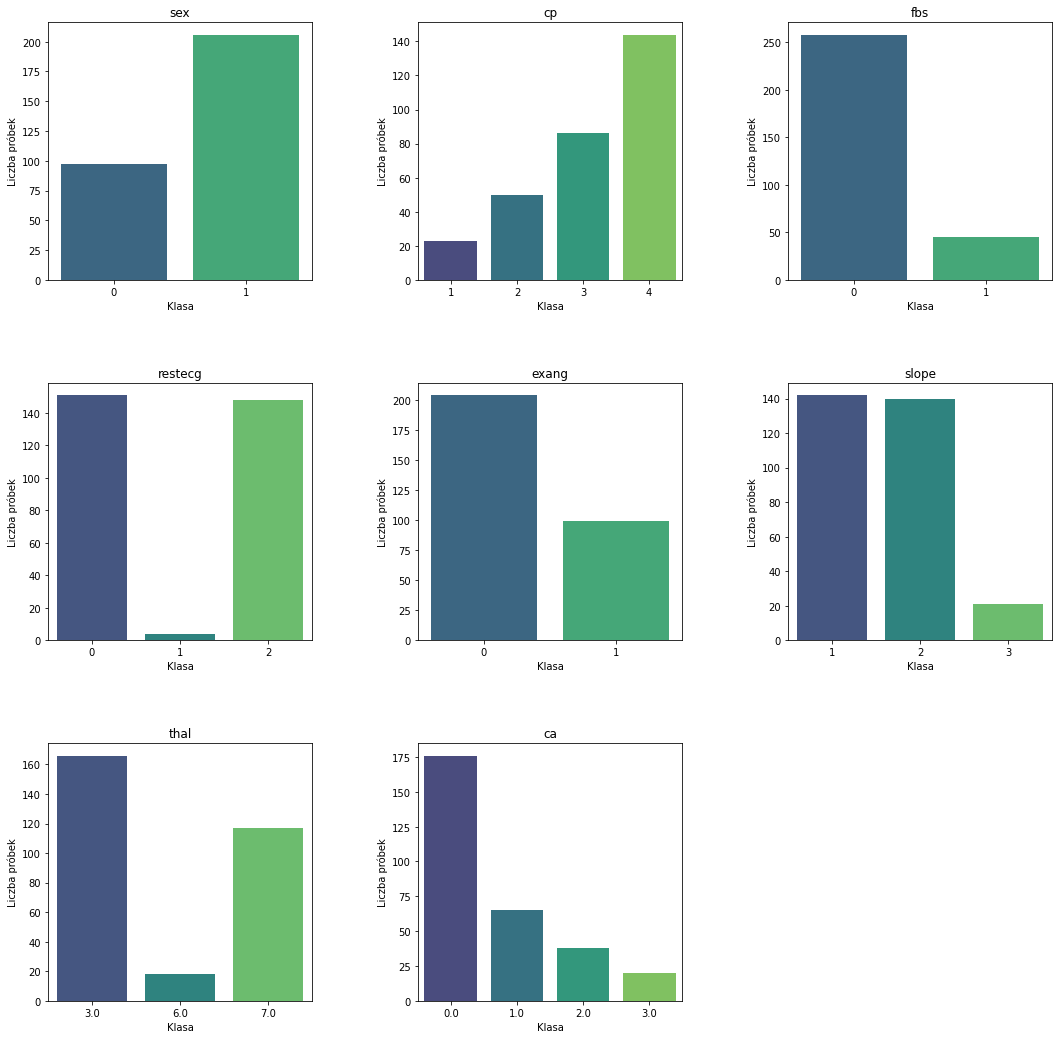

In [10]:
fig, axs = plt.subplots(3, 3, figsize=(18, 18))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

categorical_features_labels_copy = categorical_features_labels.copy()
for i in range(3):
    for j in range(3):
        if categorical_features_labels_copy:
            category = categorical_features_labels_copy.pop(0)
            class_counts = X[category].value_counts()
            sns.barplot(x=class_counts.index, y=class_counts.values, ax=axs[i, j], palette='viridis')
            axs[i, j].set_xlabel("Klasa")
            axs[i, j].set_ylabel('Liczba próbek')
            axs[i, j].set_title(category)
        else:
            axs[i, j].axis('off')
plt.show()

Jak widać na podstawie histogramów dla cech kategorycznych, rozkład dla żadnej z cech nie jest w przybliżeniu równomierny. Nawet dla takich cech jak płeć widać, że mężczyzn jest około dwa razy więcej niż kobiet. 

### Brakujące dane

In [11]:
columns_with_nan = X.columns[X.isna().any()].tolist()
nan_counts = X[columns_with_nan].isna().sum()

result_df = pd.DataFrame(list(zip(columns_with_nan, nan_counts)), columns=['Cecha', 'Brakujące'])
display(result_df)

,Cecha,Brakujące
0,ca,4
1,thal,2


Jak widać dla dwóch cech występują brakujące wartości :
 - ca 4
 - thal 2 

Nie są to duże ilości, więc można poprostu usunąć próbki, które je zawierają.
 

In [12]:
indices_to_keep = X.dropna().index
X_cleaned = X.loc[indices_to_keep].reset_index()
Y_cleaned = Y.loc[indices_to_keep].reset_index()

display(X_cleaned, Y_cleaned)

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0
293,298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
294,299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
295,300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0


,index,num
0,0,0
1,1,2
2,2,1
3,3,0
4,4,0
...,...,...
292,297,1
293,298,1
294,299,2
295,300,3


Zgodnie z przewidywaniem po operacji czyszczenia danych liczba próbek zmniejszyła się z 303 do 297 i nie zawierają już brakujących cech.

## Ćwiczenie 2 - Uczenie maszynowe, regresja logistyczna

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler

### Przygotowanie danych

Zamiana wartości etykiety 1,2,3,4 na 1 a 0 na 0 tak by możliwa była do przeprowadzanie klasyfikacja binarna (0 - zdrowy, 1 - chory).

In [14]:
Y = Y_cleaned['num'].apply(lambda x: 0 if x == 0 else 1)
display(Y)

0      0
1      1
2      1
3      0
4      0
      ..
292    1
293    1
294    1
295    1
296    1
Name: num, Length: 297, dtype: int64

Przekształcenie cech kategorycznych na wartości binarne one-hot-encoding (0,1), oraz dodanie kolumny bias której wartość jest zawsze równa 1.

In [25]:
# One-hot-encoding
X = pd.get_dummies(X_cleaned, columns = categorical_features_labels)
X = X.reset_index(drop=True)
boolean_columns = X.select_dtypes(include=bool).columns
X[boolean_columns] = X[boolean_columns].astype(int)

# Normalizacja
X = X.drop(X.columns[0], axis=1)
scaler = MinMaxScaler()
X[numerical_features_labels] = scaler.fit_transform(X[numerical_features_labels])

# Bias
X['bias'] = 1

display(X)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,bias
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
1,0.791667,0.622642,0.365297,0.282443,0.241935,0,1,0,0,0,...,1,0,1,0,0,0,0,0,1,1
2,0.791667,0.245283,0.235160,0.442748,0.419355,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
3,0.166667,0.339623,0.283105,0.885496,0.564516,0,1,0,0,1,...,0,1,1,0,0,1,0,0,0,1
4,0.250000,0.339623,0.178082,0.770992,0.225806,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,0.583333,0.433962,0.262557,0.396947,0.032258,1,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
293,0.333333,0.150943,0.315068,0.465649,0.193548,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
294,0.812500,0.471698,0.152968,0.534351,0.548387,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,1
295,0.583333,0.339623,0.011416,0.335878,0.193548,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0,1


Podział danych na zbiór trenujący i testujący (proporcja 1:1).

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.5, random_state = 42)

### Regresja logistyczna 

Na początku została zdefiniowana funkcja f modelu, która pobiera wektor cech X oraz wektor wag &theta;. Wektory te są następnie mnożone ze sobą skalarnie, co zwraca liczbę rzeczywistą jako wynik. Z racji na to, że problem dotyczy klasyfikacji binarnej model powinien zwracać prawdopodobieństwo przynależności dla jednej z klas dla danej próbki. Aby to uzyskać wynik mnożenia skalarnego podawany jest jako argument funkcji sigmoidalnej, która zwraca wyniki z ciągłego przedziału (0,1). Traktujemy je jako prawdopodobieństwo przynależenia do jednej z klasy (w tym przypadku klasy 1 czyli chory).

In [27]:
def f_model(x, tetha):
    return 1 / (1 + np.exp(-(x @ tetha)))

Następnie została zdefiniowana funkcja licząca gradient funkcji błędu dla danej próbki. W tym przypadku jako funkcja błędu została użyta entropia krzyżowa.

In [28]:
def lce_deriv(y_pred, y_exp, x):
    return (y_pred - y_exp) * x

Kolejna funkcja przekształca wartości wektora wag &theta; dla jednej epoki (czyli iteruje po wszytkich próbkach ze zbioru treningowego). Zawsze na początku miesza zbiór treningowy, tak aby model nie dopasował się do powtarzającej się w kolejnych epokach kolejności próbek, następnie dla danej próbki liczy na podstawie obecnego wektora wag jej przewidywane prawdopodobieństwo. Następnie wartość wektora &theta; jest zmniejszana o wartości gradientu dla funkcji błędu przemnożonego przez współczynnik uczenia.

In [29]:
def one_epoch_train(
    x_train: pd.DataFrame,
    y_train: pd.Series,
    learning_rate: float,
    theta: np.ndarray):
    
    x_train, y_train = shuffle(x_train, y_train)
    for i, x in x_train.iterrows():               
        x = x.to_numpy()
        y_pred = f_model(x, theta)
        theta -= learning_rate * lce_deriv(y_pred, y_train[i], x)
    return theta

Następnie został utworzony wektor wag i wypełniony losowymi liczbami rzeczywistymi. Maksymalna liczba epok została ustawiona na 1000, współczynnik uczenia ma wartość 0.001, a oczekiwana dokładność 0.80. Dla każdej epoki przeprowadzane jest uczenie zdefiniowane we wcześniejszej funkcji oraz po zakończeniu epoki badana jest dokładność modelu, jeżeli przekroczy ona wartość oczekiwaną uczenie zostaje przerwane. Na koniec zwracane są ogólne statystyki modelu. 

In [43]:
theta = np.random.rand(X.shape[1])
max_epochs_number = 1000
learning_rate = 0.001
expected_accuracy = 0.80

for i in range(max_epochs_number):
    theta = one_epoch_train(X_train, Y_train, learning_rate, theta)

    y_pred_test = f_model(X_test, theta)
    threshold = 0.5
    y_pred_test_binary = (y_pred_test >= threshold).astype(int)
    if accuracy_score(Y_test, y_pred_test_binary) >= expected_accuracy:
        break

y_pred_test = f_model(X_test, theta)
threshold = 0.5
y_pred_test_binary = (y_pred_test >= threshold).astype(int) 

accuracy = accuracy_score(Y_test, y_pred_test_binary)
precision = precision_score(Y_test, y_pred_test_binary)
recall = recall_score(Y_test, y_pred_test_binary)
f1 = f1_score(Y_test, y_pred_test_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)



Accuracy: 0.8120805369127517
Precision: 0.7865168539325843
Recall: 0.8860759493670886
F1-score: 0.8333333333333333


Jak widać została otrzymana dokładność na poziomie 85%, precycja 87% oraz czułość 85%. Można takie wyniki potraktować za zadowalające przy tak stosunkowo małej liczbie próbek oraz modelu opartym na regresji liniowej.